## Introduction to Data Science

### Introduction to Visualization Tools


Additional Sources:  
[Python Visualization Tools](http://pbpython.com/visualization-tools-1.html)  
[Python Visualization Libraries](https://blog.modeanalytics.com/python-data-visualization-libraries/)  
[Python Data Visualization Libraries](https://www.dataquest.io/blog/python-data-visualization-libraries/)  
[Python Visualization Landscape](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)  
[Guide to Data Visualization with Python](https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e)  
[Examples of Stuning Data Visualizations](https://towardsdatascience.com/15-stunning-data-visualizations-and-what-you-can-learn-from-them-fc5b78f21fb8)  


In [53]:
import os
import sys
import pathlib

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

## Data Visualization

Let's explore some of the most popular plotting packages in the Python Ecosystem

  1. Matplotlib
  2. Pandas
  3. Seaborn
  4. Bokeh
  5. Plotly
  6. Altair
  7. MplD3
  8. Ggplot
  9. PlotNine
  10. Pygal
  11. Geoplotlib
  12. Holoviews
  13. Folio (Leaflet)
  14. Missingno

### 1 - [Matplotlib](http://matplotlib.org/users/pyplot_tutorial.html):  

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.  

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that “axes” here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).  

#### [Matplotlib Gallery](https://matplotlib.org/3.1.1/gallery/index.html)  
#### [Matplotlib Colormaps](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)  
#### [Matplotlib ColorCodes](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html) 

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook

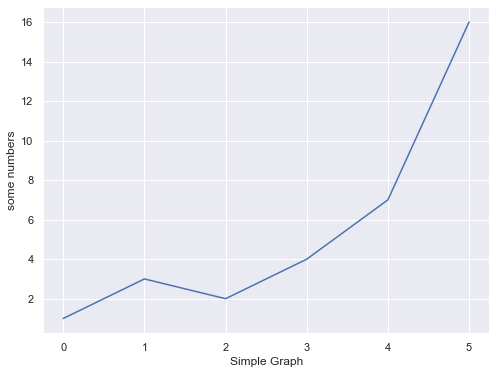

In [55]:
plt.subplots(figsize=(8,6))
plt.plot([1,3,2,4,7,16])      
#plt.plot([0,1,2,3,4,5],[1,3,2,4,7,16])
plt.ylabel('some numbers')
plt.xlabel('Simple Graph')
#plt.axis([0,10,0,20])
plt.show()

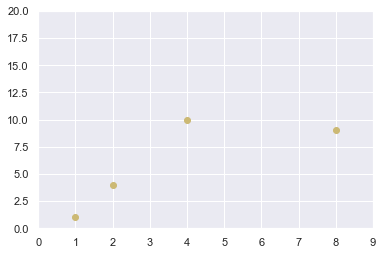

In [56]:
plt.plot([1,2,8,4], [1,4,9,10], 'yo')
plt.axis([0, 9, 0, 20])
plt.show()

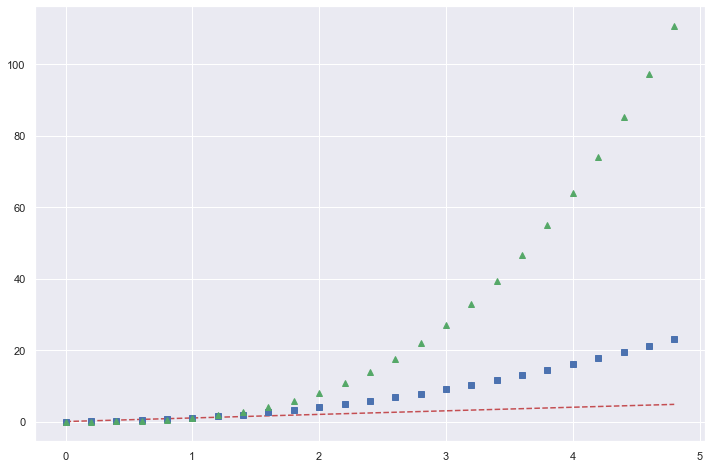

In [57]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.subplots(figsize=(12,8))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') #all at the same time

plt.show()

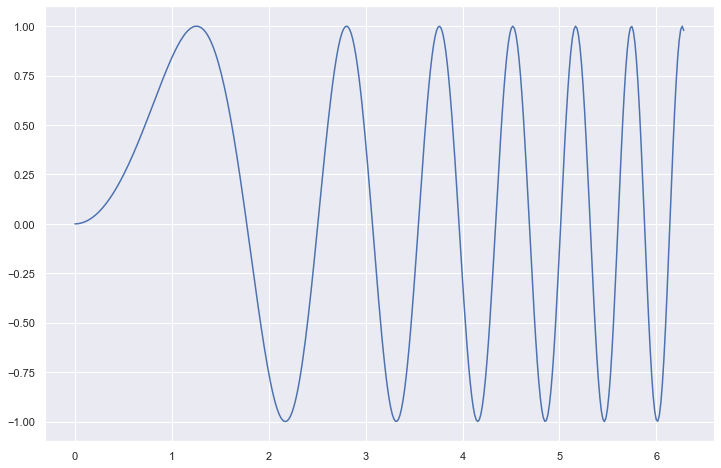

In [59]:
plt.subplots(figsize=(12,8))
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
plt.plot(x,y)
#plt.show()
plt.savefig("./myfig.png")
plt.savefig("./nextfig.svg")


Examples illustrating the use of [plt.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

This function creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. For very refined tuning of subplot creation, you can still use add_subplot() directly on a new figure.

Let's explore some use cases in the examples below:

1. Just a figure and one subplot

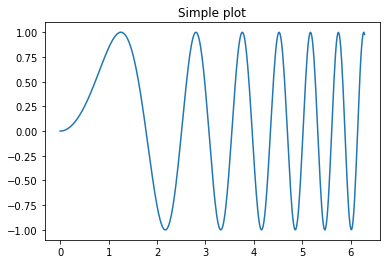

In [7]:
f, ax = plt.subplots()
ax.set_title('Simple plot')
ax.plot(x, y)
plt.show()

  2. Two subplots, the axes array is 1-d

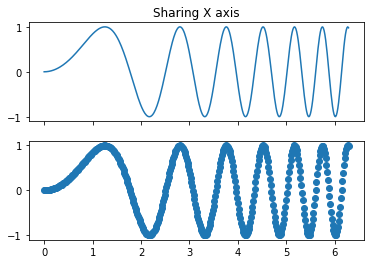

In [8]:
f, ax = plt.subplots(2, sharex=True)
ax[0].plot(x, y)
ax[0].set_title('Sharing X axis')
ax[1].scatter(x, y)
plt.show()

  3. Two subplots, unpack the axes array immediately

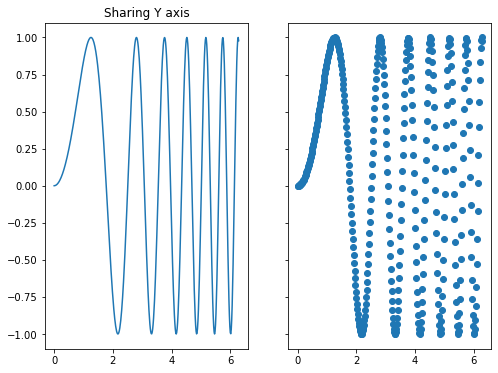

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

  4. Three subplots sharing both x/y axes

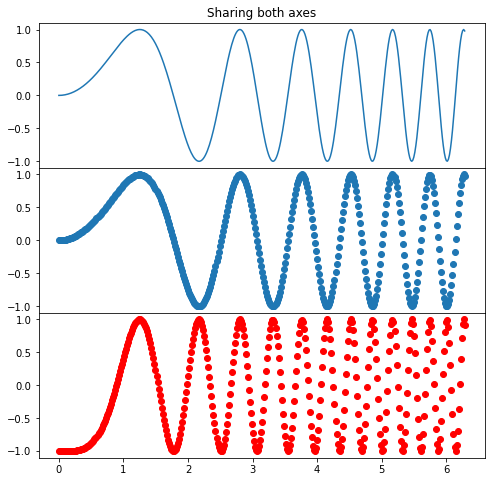

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(8,8))
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
#Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

  5. Four axes, returned as a 2-d array

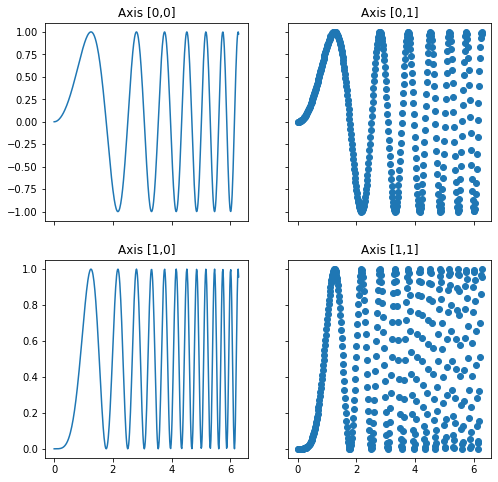

In [11]:
f, ax = plt.subplots(2, 2, figsize=(8,8))
ax[0, 0].plot(x, y)
ax[0, 0].set_title('Axis [0,0]')
ax[0, 1].scatter(x, y)
ax[0, 1].set_title('Axis [0,1]')
ax[1, 0].plot(x, y ** 2)
ax[1, 0].set_title('Axis [1,0]')
ax[1, 1].scatter(x, y ** 2)
ax[1, 1].set_title('Axis [1,1]')
#Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.show()

  6. row and column sharing

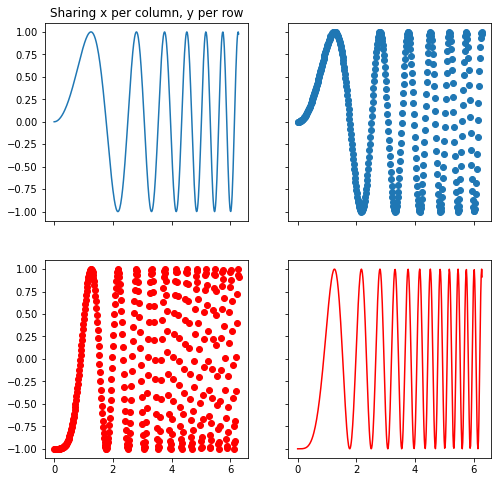

In [12]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8))
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

Instead of creating a figure with plt.subplots, we can also create with the command [plt.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html), which add an Axes to the current figure or retrieve an existing Axes.

The position of the subplot described by one of:

- Three integers (nrows, ncols, index). The subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right. index can also be a two-tuple specifying the (first, last) indices (1-based, and including last) of the subplot, e.g., fig.add_subplot(3, 1, (1, 2)) makes a subplot that spans the upper 2/3 of the figure.

- A 3-digit integer. The digits are interpreted as if given separately as three single-digit integers, i.e. fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5). Note that this can only be used if there are no more than 9 subplots.

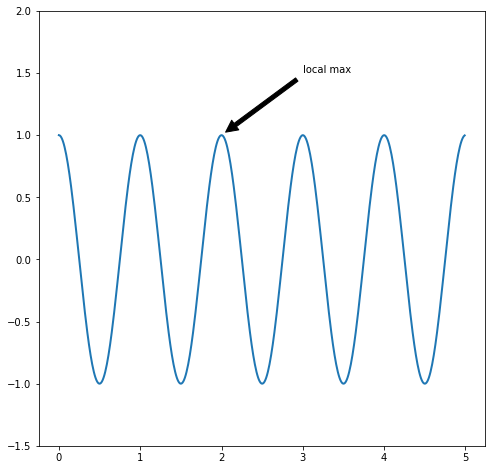

In [13]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
plt.plot(t, s, lw=2)

plt.annotate('local max', 
             xy=(2, 1), 
             xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05)
            )

plt.ylim(-1.5,2)
plt.show()

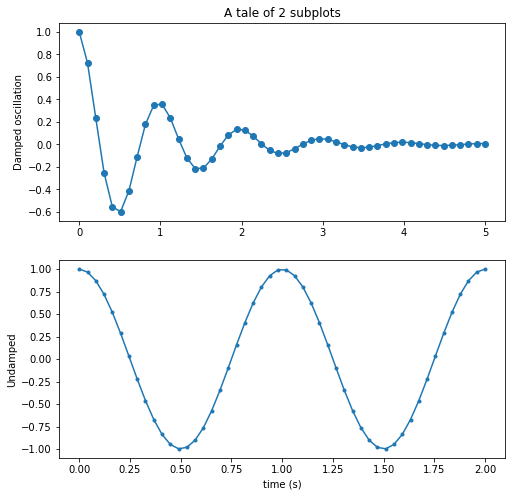

In [14]:
plt.figure(figsize=(8,8))

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

#### Matplotlib has other types of graphs. The whole set of examples shall be consulted in the [Matplotlib Gallery](https://matplotlib.org/3.1.1/gallery/index.html) 

1. Histogram  

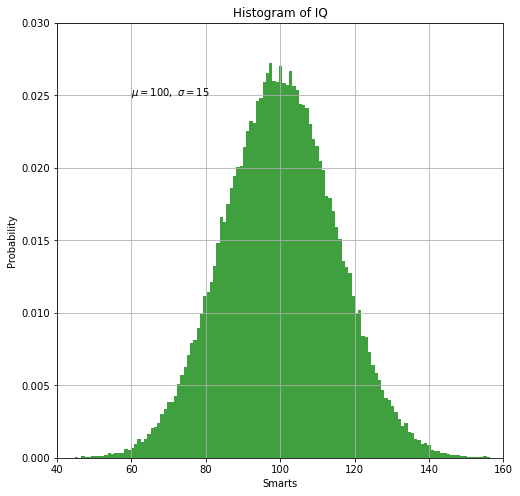

In [15]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(100000)

plt.figure(figsize=(8,8))
plt.hist(x, 150, density=True, facecolor='g', alpha=0.75)
# n, bins, patches = plt.hist(x, 150, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, '$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

2. Barplot

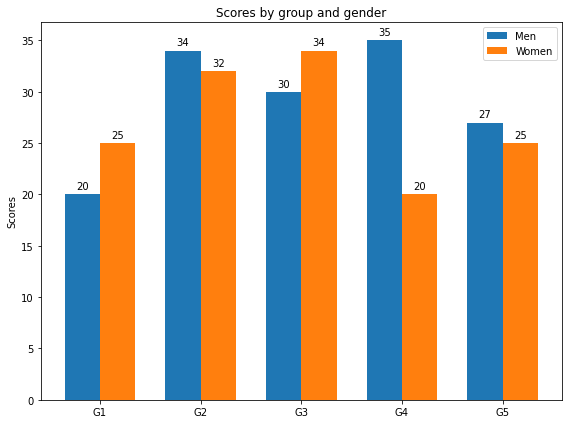

In [16]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

3. We can convert a two dimensional array into a colormap:  

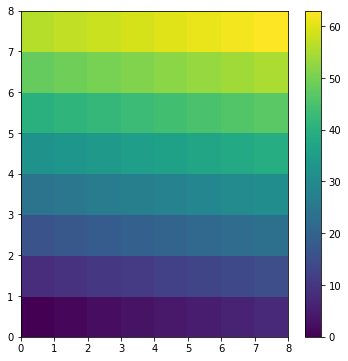

In [17]:
#a = np.random.random((8,8))
a = np.arange(64).reshape(8,8)

plt.subplots(figsize=(6,6))
plt.pcolor(a)
plt.colorbar()
plt.show()

4. We can also use colors and sizes to convey more information, like in the example below  

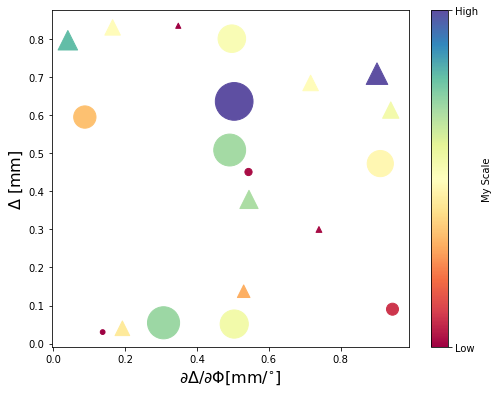

In [18]:
data = np.random.random((10, 4))
data2 = np.random.random((10, 4))

fig, ax = plt.subplots(figsize=(8,6))

plt.subplots_adjust(bottom = 0.1)
plt.xlabel('$\partial \Delta/\partial\Phi[$mm$/^{\circ}]$', fontsize = 16)
plt.ylabel('$\Delta$ [mm]', fontsize = 16)

plt.scatter(data[:, 0], 
            data[:, 1], 
            marker = 'o', 
            c = data[:, 3], 
            s = data[:, 3]*1500,
            cmap = plt.cm.Spectral, 
            vmin = min(data[:, 3]), 
            vmax = max(data[:, 3]))

plt.scatter(data2[:, 0], 
            data2[:, 1], 
            marker = '^', 
            c = data2[:, 2], 
            s = data2[:, 2]*500,
            cmap = plt.cm.Spectral, 
            vmin = min(data2[:, 2]), 
            vmax = max(data2[:, 2]))

cbar = plt.colorbar(ticks = [min(data2[:, 2]), max(data2[:, 2])])
cbar.ax.set_yticklabels(['Low', 'High'])
cbar.set_label(r'My Scale')

plt.show()

### 2 - Pandas Plotting

In [19]:
iris = pd.read_csv("../../Data/CSV/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

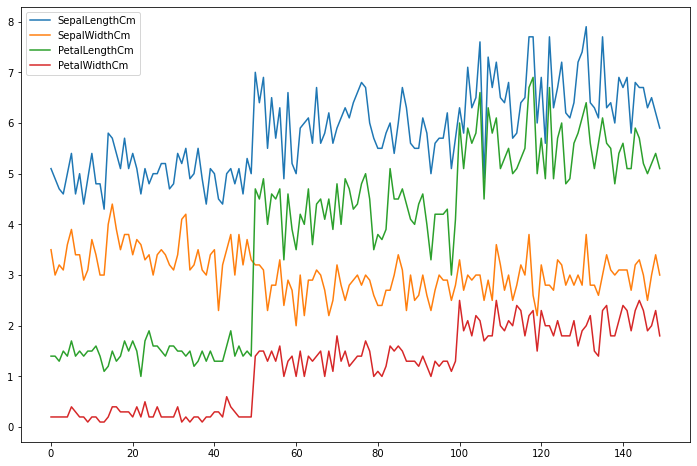

In [21]:
iris.iloc[:,1:].plot(figsize=(12,8))

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

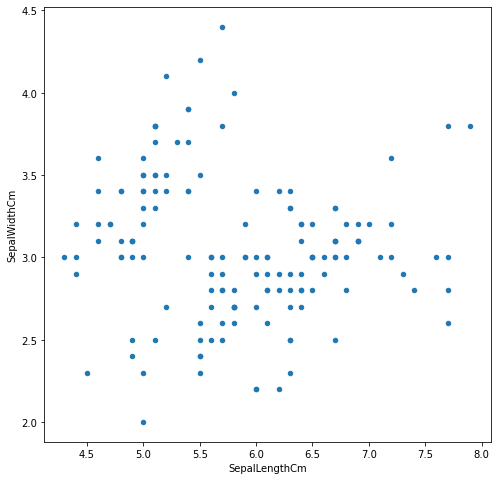

In [22]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", figsize=(8,8))

array([[<AxesSubplot:title={'center':'Id'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>,
        <AxesSubplot:>]], dtype=object)

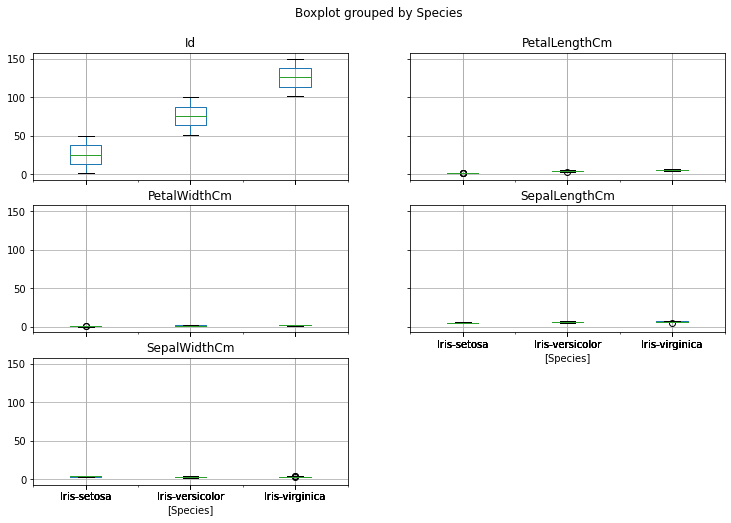

In [23]:
iris.boxplot(by="Species", figsize=(12, 8))

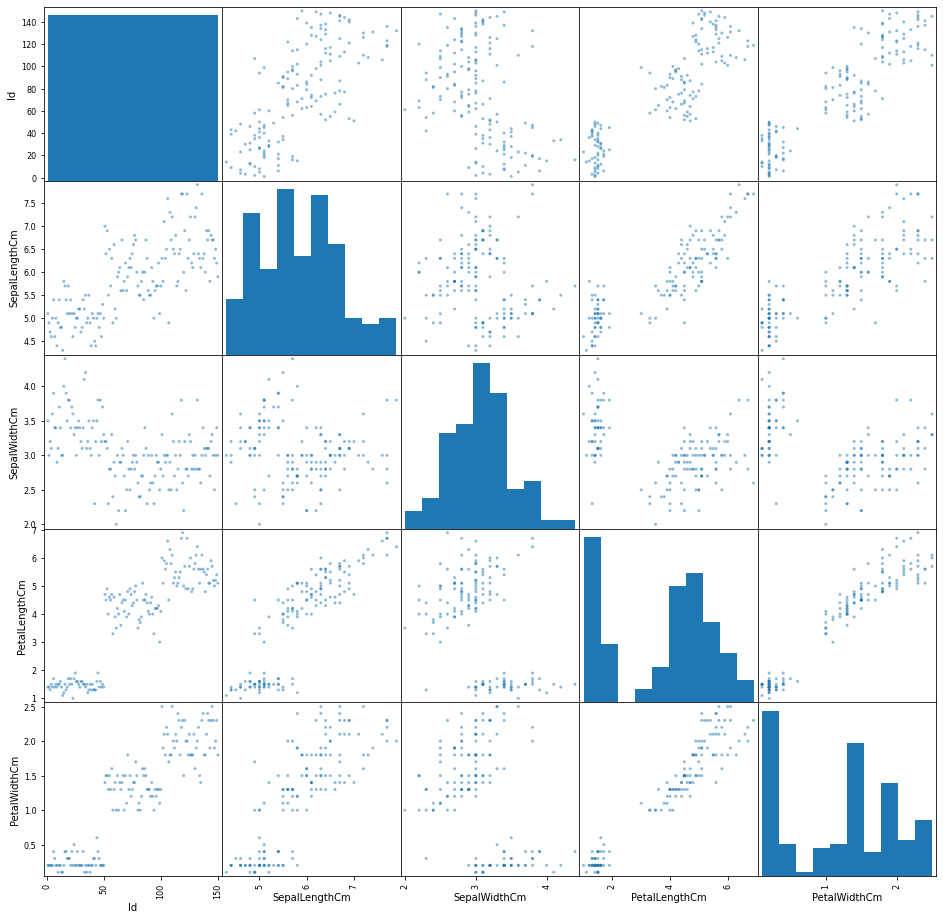

In [24]:
pd.plotting.scatter_matrix(iris, figsize=(16,16))
plt.show()

<AxesSubplot:>

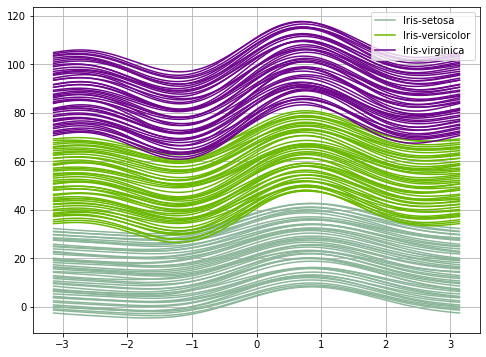

In [25]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these

from pandas.plotting import andrews_curves
fig, ax = plt.subplots(figsize=(8,6))
andrews_curves(iris, "Species",ax=ax)

<AxesSubplot:>

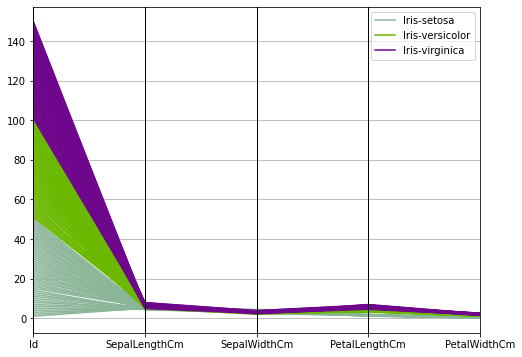

In [26]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample

from pandas.plotting import parallel_coordinates
fig, ax = plt.subplots(figsize=(8,6))
parallel_coordinates(iris, "Species", ax=ax)

<AxesSubplot:>

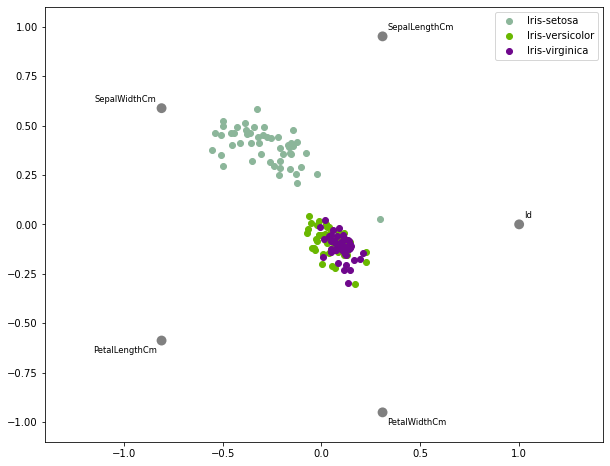

In [27]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature

from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(10,8))
radviz(iris, "Species", ax=ax,)

#### Using Pandas styles

In [28]:
df_temporal = pd.read_csv('../../Data/CSV/temporal.csv')
df_temporal.head(10) #View first 10 data rows

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [29]:
#df_temporal.describe()
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [30]:
format_dict = {'data science':'${0:,.2f}', 
               'Mes':'{:%m-%Y}', 
               'machine learning':'{:.2%}'} #We make sure that the Month column has datetime format
df_temporal['Mes'] = pd.to_datetime(df_temporal['Mes']) #We apply the style to the visualization
df_temporal.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


In [31]:
df_temporal.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1
5,06-2004,$9.00,1700.00%,3,1
6,07-2004,$9.00,1600.00%,3,1
7,08-2004,$7.00,1400.00%,3,1
8,09-2004,$10.00,1700.00%,4,1
9,10-2004,$8.00,1700.00%,4,1


In [32]:
df_temporal.head().style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


In [33]:
df_temporal.head(10).style.format(format_dict).background_gradient(subset=['data science', 
                                                                           'machine learning'], 
                                                                   cmap='BuGn').highlight_max(color='yellow')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1
5,06-2004,$9.00,1700.00%,3,1
6,07-2004,$9.00,1600.00%,3,1
7,08-2004,$7.00,1400.00%,3,1
8,09-2004,$10.00,1700.00%,4,1
9,10-2004,$8.00,1700.00%,4,1


### 3 - [Seaborn](https://seaborn.pydata.org/)

References: [1](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial), [2](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

In [34]:
import seaborn as sns
#sns.set(style="white", color_codes=True)
%matplotlib inline

In [35]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


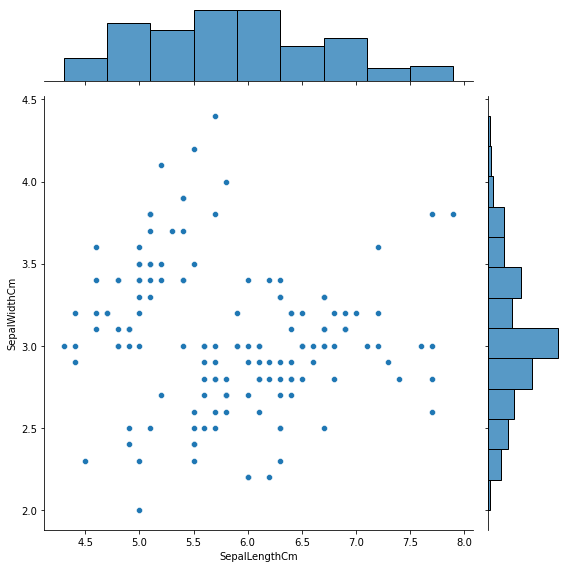

In [36]:
# We can also use the seaborn library to make a similar plot to Pandas
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=8)

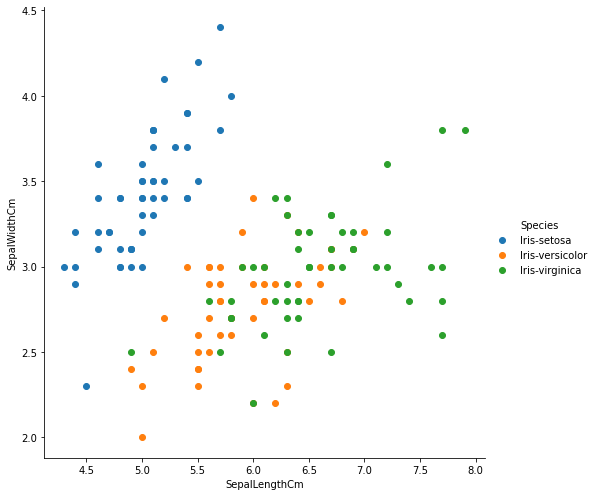

In [37]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species

sns.FacetGrid(iris, hue="Species", height=7).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

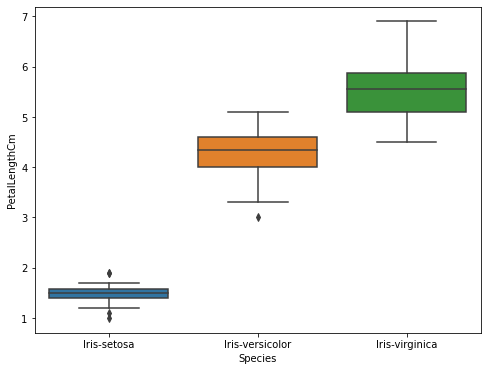

In [38]:
# We can look at an individual feature in Seaborn through a boxplot
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(x='Species', y='PetalLengthCm', width=0.8, data=iris, ax=ax)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

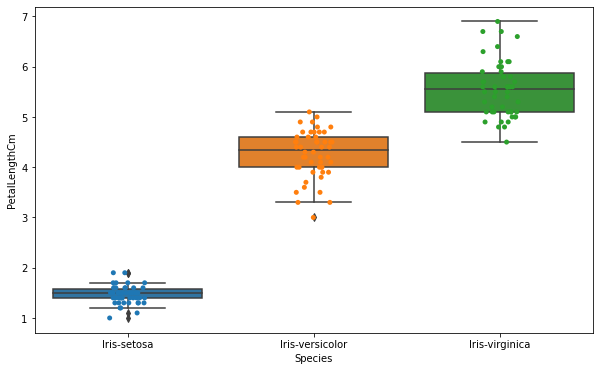

In [39]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, ax=ax)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, ax=ax, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

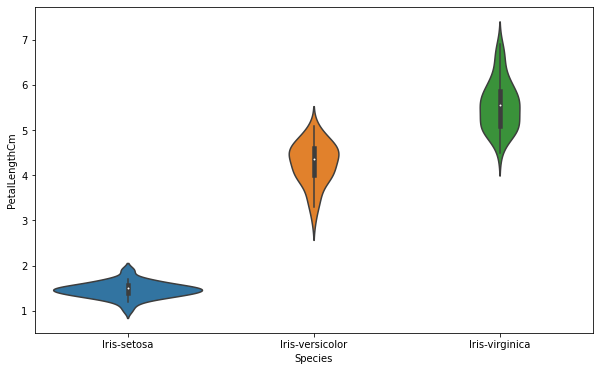

In [40]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6, ax=ax)

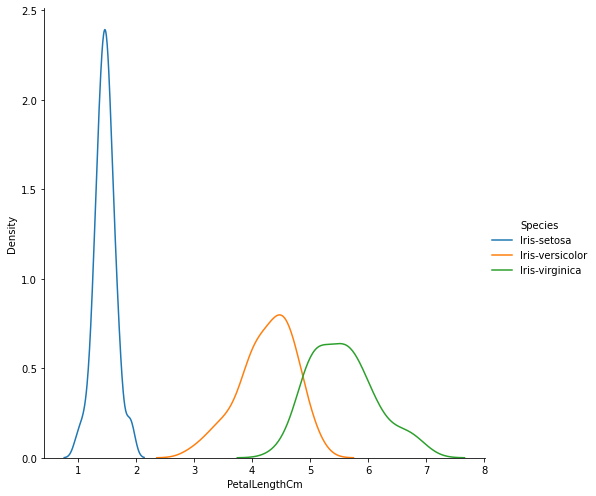

In [41]:
# A seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(iris, hue="Species", height=7).map(sns.kdeplot, "PetalLengthCm").add_legend()

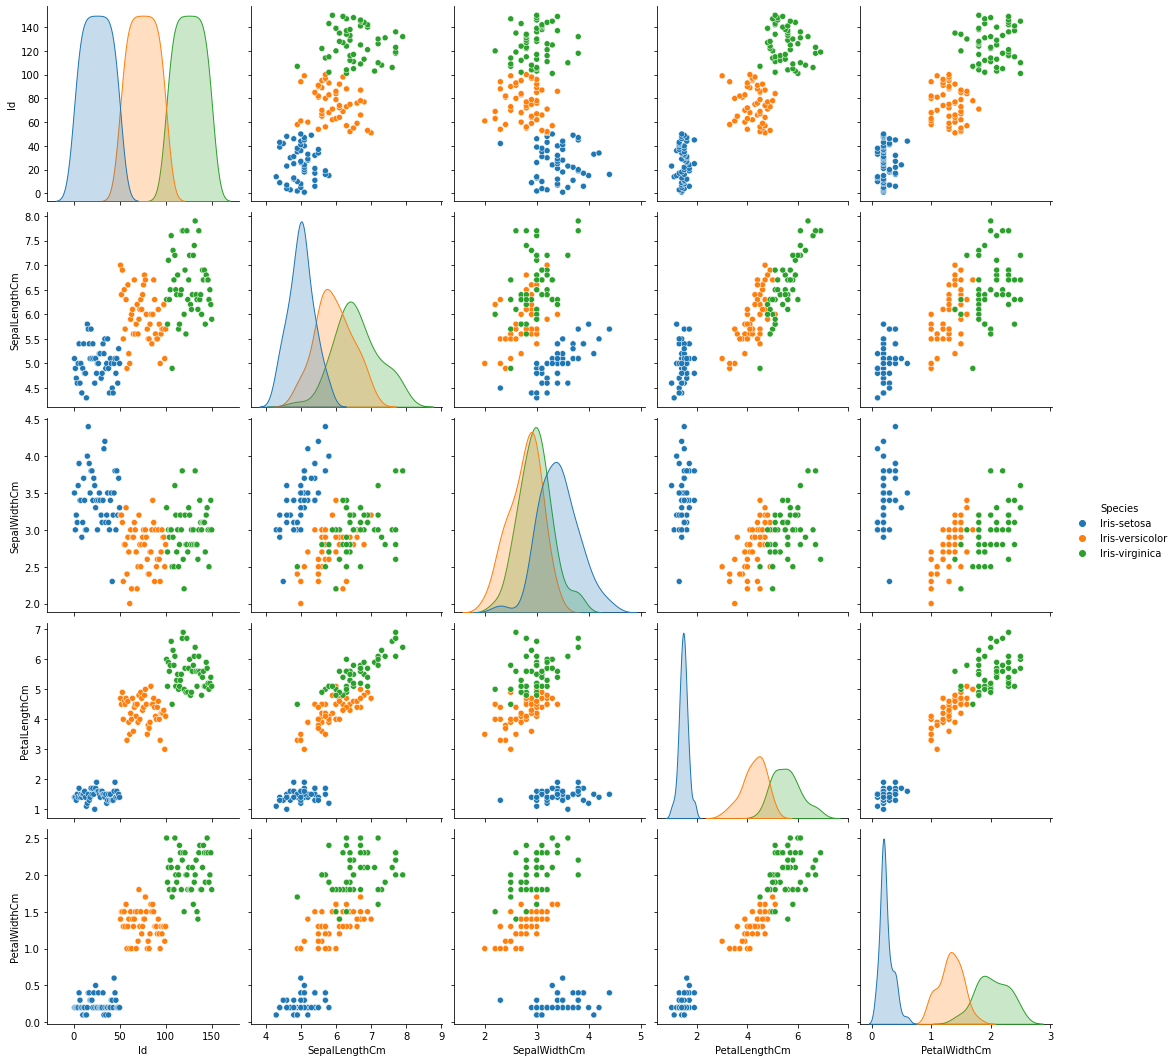

In [42]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations

sns.pairplot(iris, hue="Species", height=3)

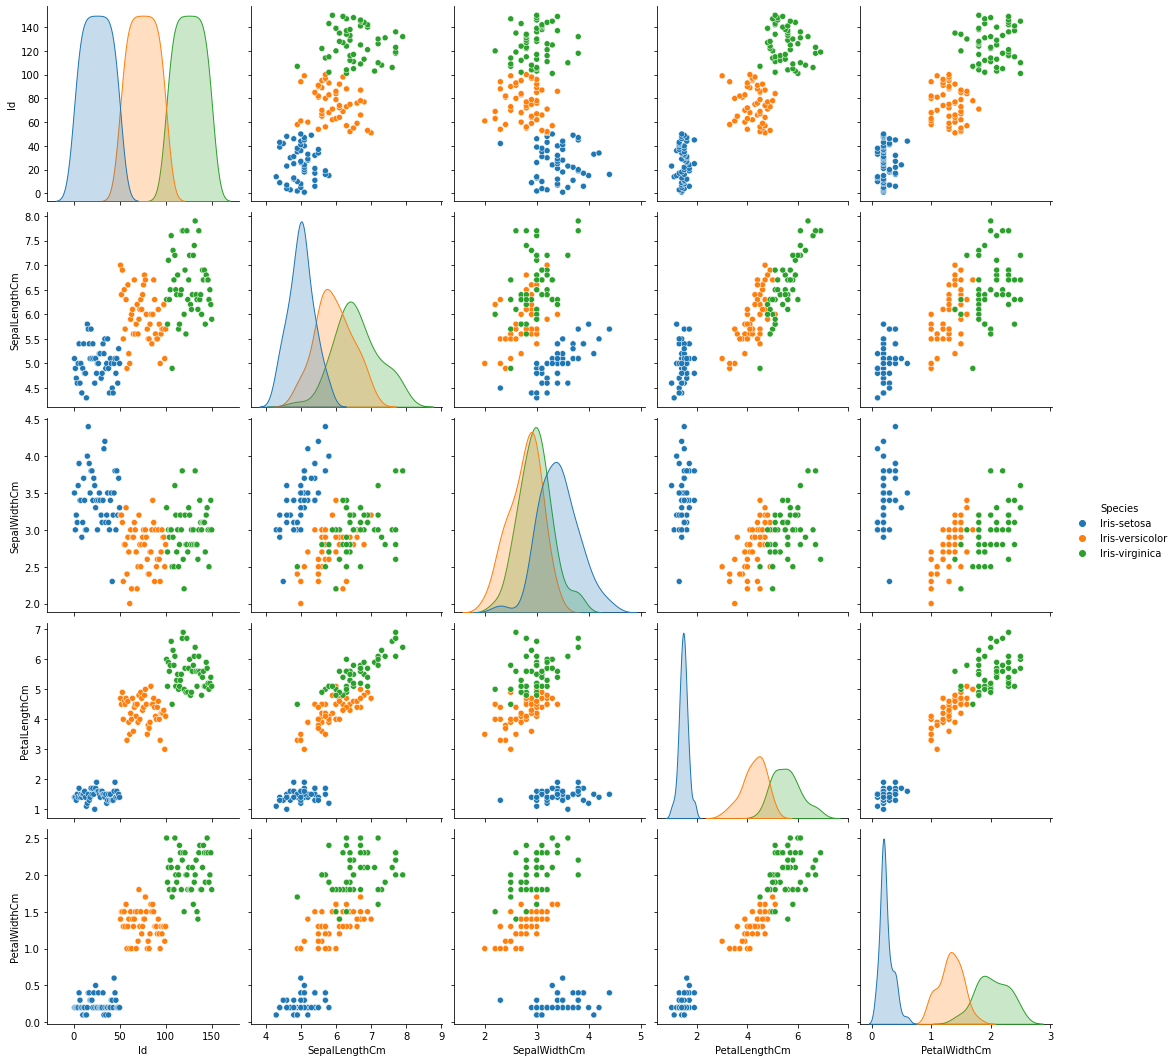

In [43]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde

sns.pairplot(iris, hue="Species", height=3, diag_kind="kde")

<AxesSubplot:xlabel='Mes', ylabel='data science'>

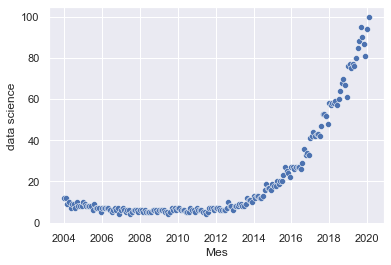

In [44]:
sns.set()
sns.scatterplot(x=df_temporal['Mes'], y=df_temporal['data science'])

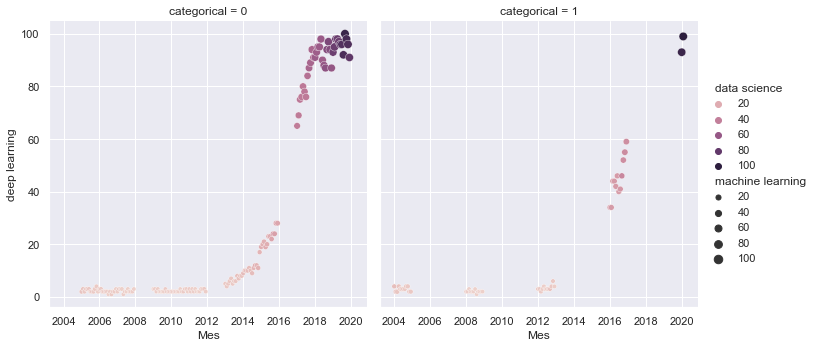

In [45]:
sns.relplot(x='Mes', 
            y='deep learning', 
            hue='data science', 
            size='machine learning', 
            col='categorical', 
            data=df_temporal)

<AxesSubplot:>

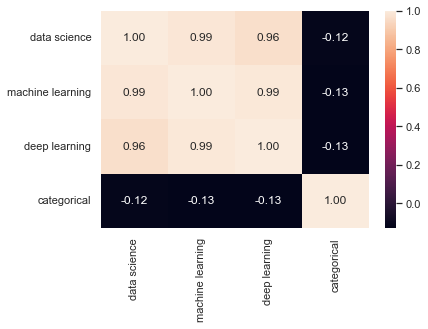

In [46]:
sns.heatmap(df_temporal.corr(), annot=True, fmt='.2f')

## 4 - [Bokeh](https://bokeh.pydata.org/en/latest/)

References: 
[1](https://towardsdatascience.com/data-visualization-with-bokeh-in-python-part-one-getting-started-a11655a467d4), [2](https://github.com/WillKoehrsen/Bokeh-Python-Visualization/blob/master/intro/exploration/first_histogram.ipynb)

In [47]:
#!pip install -q -U bokeh
#!pip install typing-extensions --upgrade
#import pip
#pip.main(['install','bokeh'])
#pip.main(['install','ipympl'])

In [48]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook, curdoc
from bokeh.models import ColumnDataSource, HoverTool, Panel, Tabs, CheckboxGroup, CategoricalColorMapper
from bokeh.layouts import row, widgetbox
from bokeh.palettes import Category10_5, Category20_16

In [49]:
# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]
circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

GlyphRenderer(id='1045', ...)

In [50]:
#%matplotlib inline
%matplotlib widget
# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

ModuleNotFoundError: No module named 'ipympl'

In [ ]:
flights = pd.read_csv('../../Data/CSV/flights.csv', index_col=0)
flights.head()

In [ ]:
sys.getsizeof(flights)

In [ ]:
flights.info()

In [ ]:
flights.dropna(inplace=True)

In [ ]:
flights['arr_delay'].describe()

In [ ]:
"""Bins will be five minutes in width, so the number of bins 
is (length of interval / 5). Limit delays to [-60, +120] minutes using the range."""

arr_hist, edges = np.histogram(flights['arr_delay'], 
                               bins = int(180/5), 
                               range = [-60, 120])

# Put the information in a dataframe
delays = pd.DataFrame({'arr_delay': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [ ]:
delays.head()

In [ ]:
# Set up the figure
p = figure(plot_width = 500, plot_height = 500, title = 'Histogram of Arrival Delays',
          x_axis_label = 'Minutes', y_axis_label = 'Count')

# Add a quad glyph
p.quad(bottom=0, 
       top=arr_hist, 
       left=edges[:-1], 
       right=edges[1:], 
       fill_color='red', 
       line_color='black')

# To show in notebook
output_notebook()

# Show the plot
show(p)

#### Adding Style

In [ ]:
def style(p):
    p.title.align = 'center'
    p.title.text_font_size = '18pt'
    p.xaxis.axis_label_text_font_size = '12pt'
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.axis_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    
    return p

In [ ]:
styled_p = style(p)

show(styled_p)

#### Adding Interactivity

In [ ]:
arr_df = pd.DataFrame({'count': arr_hist, 'left': edges[:-1], 'right': edges[1:]})
arr_df['f_count'] = ['%d flights' % count for count in arr_df['count']]
arr_df['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]

arr_df.head()

In [ ]:
arr_src = ColumnDataSource(arr_df)
arr_src.data.keys()

In [ ]:
# Convert to column data source
src = ColumnDataSource(delays)
src.data.keys()

#### Adding tooltips

In [ ]:
# Set up the figure same as before
p = figure(plot_width = 500, plot_height = 500, title = 'Histogram of Arrival Delays',
          x_axis_label = 'Minutes', y_axis_label = 'Count')

# Add a quad glyph with source this time
p.quad(bottom=0, 
       top='count', 
       left='left', 
       right='right', 
       source=arr_src,
       fill_color='red', 
       line_color='black')

# Add style to the plot
styled_p = style(p)

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Delay', '@f_interval'),
                              ('Count', '@f_count')])

# Add the hover tool to the graph
styled_p.add_tools(hover)

# Show the plot
show(styled_p)

#### Adding hover tool

In [ ]:
# Hover tool referring to our own data field using @ and
# a position on the graph using $
h = HoverTool(tooltips = [('Delay Interval Left ', '@left'),
                          ('(x,y)', '($x, $y)')])

In [ ]:
# Add a column showing the extent of each interval
delays['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(delays['left'], delays['right'])]

In [ ]:
# Create the blank plot
p = figure(plot_height = 600, 
           plot_width = 600,
           title = 'Histogram of Arrival Delays',
           x_axis_label = 'Delay (min)]',
           y_axis_label = 'Number of Flights')

# Add a quad glyph with source this time
p.quad(bottom=0, 
       top='arr_delay', 
       left='left', 
       right='right', 
       source=src,
       fill_color='red', 
       line_color='black', 
       fill_alpha = 0.75,
       hover_fill_alpha = 1.0, 
       hover_fill_color = 'navy')

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Delay', '@f_interval'),
                              ('Num of Flights', '@f_flights')])

# Style the plot
p = style(p)

# Add the hover tool to the graph
p.add_tools(hover)

# Show the plot
show(p)

### 5 - [Plotly](https://plot.ly/python/)  

In [ ]:
#import pip
#pip.main(['install','plotly'])

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' #'jupyterlab' #"browser"

fig = go.Figure(data=[go.Bar(y=[2, 1, 3])], layout_title_text="A Figure Displayed with fig.show()")

fig.show()

In [ ]:
# x and y given as DataFrame columns
import plotly.express as px
iris = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(iris, x="sepal_width", y="sepal_length")
fig.show()

In [ ]:
iris = px.data.iris()
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

In [ ]:
t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig.show()

### 6 - [Altair](https://altair-viz.github.io/)

Reference: [1](https://altair-viz.github.io/user_guide/display.html#display-notebook)

In [ ]:
#import pip
#pip.main(['install','altair'])
#pip.main(['install','vega-datasets'])

In [ ]:
import altair as alt
from vega_datasets import data

In [ ]:
df = data.seattle_weather()
df.head()

In [ ]:
alt.Chart(df).mark_tick().encode(x='precipitation',)

In [ ]:
alt.Chart(df).mark_bar().encode(alt.X('precipitation', bin=True),
                                alt.Y('count(*):Q'))

In [ ]:
alt.Chart(df).mark_line().encode(
    alt.X('date:T', timeUnit='month'),
    alt.Y('average(precipitation)'))

### 7 - [MplD3](http://mpld3.github.io/)

Reference: [1](https://mpld3.github.io/)

In [ ]:
#import pip
#pip.main(['install','mpld3'])

In [ ]:
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

In [ ]:
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
#mpld3.display()
mpld3.enable_notebook()
mpld3.display()

## Other Visuatlisation tools to explore

### 8 - [Ggplot](https://github.com/yhat/ggpy)
References: [1](https://github.com/yhat/ggpy)

### 9 - [PlotNine](https://plotnine.readthedocs.io/en/stable/)
References: [1](https://towardsdatascience.com/how-to-use-ggplot2-in-python-74ab8adec129)

### 10 - [Pygal](http://pygal.org/en/stable/)

### 11 - [Geoplotlib](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide)

### 12 - [Holoviews](http://holoviews.org/)

### 13 - [Folio (Leaflet)](http://python-visualization.github.io/folium/docs-v0.5.0/)

### 14 - [Missingno](http://python-visualization.github.io/folium/docs-v0.5.0/)
References: [1](https://github.com/ResidentMario/missingno), [2](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)